In [1]:
from mnmf import mnmf
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from drawer import plot_spectogram, mean_squared_error, spectral_difference
from mnmf import mnmf

FRAME1 = 4096
HOP = 2048
NUM_ITER = 100

In [2]:
part1_org, sr = librosa.load('../data/sound2.wav')
part2_org, sr = librosa.load('../data/sound1.wav')

trim = min(len(part1_org), len(part2_org))

part1_org = part1_org[:trim]
part2_org = part2_org[:trim]

orgs = np.vstack([part1_org, part2_org])

display(ipd.Audio(part1_org, rate = sr))
display(ipd.Audio(part2_org, rate = sr))

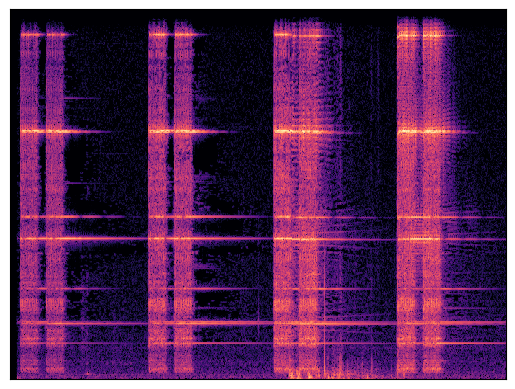

In [3]:
plot_spectogram(part1_org, sr)

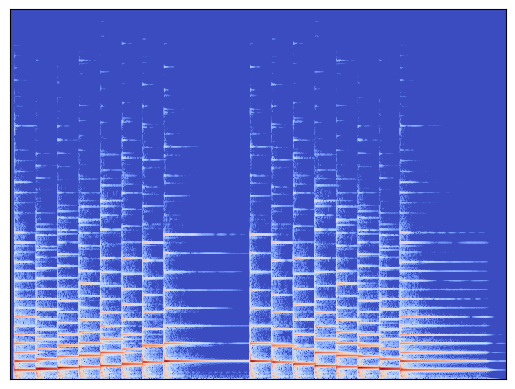

In [4]:
plot_spectogram(part2_org, sr)

In [5]:
part1, sr = librosa.load('../data/sound2_mix.mp3')
part2, sr = librosa.load('../data/sound1_mix.mp3')

trim = min(len(part1_org), len(part2_org))

part1 = part1[:trim]
part2 = part2[:trim]

x = np.vstack([part2, part1])

n_channels, T = x.shape
n_sources = n_channels

display(ipd.Audio(part1, rate = sr))
display(ipd.Audio(part2, rate = sr))

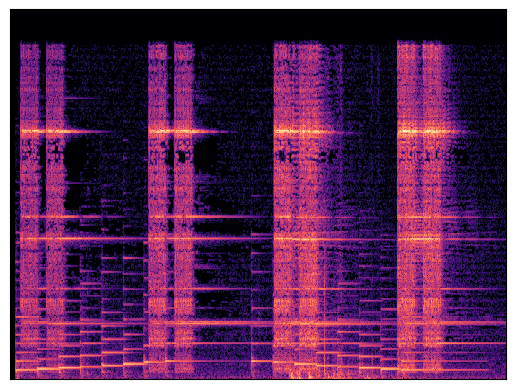

In [6]:
plot_spectogram(part1, sr)

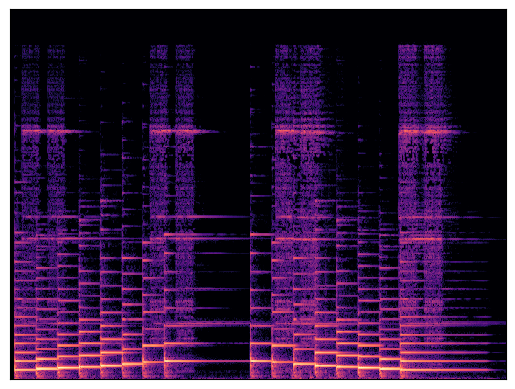

In [7]:
plot_spectogram(part2, sr)

In [8]:
_, _, X = ss.stft(x, nperseg = FRAME1, noverlap = HOP)
Y = mnmf(X, n_basis = 2, iteration = NUM_ITER)
_, y = ss.istft(Y, nperseg = FRAME1, noverlap = HOP)
y = y[:, :T]

In [9]:
for i in y:
    display(ipd.Audio(i, rate = sr))

In [14]:
spd = spectral_difference(part1_org, y[1])
print("Spectral difference beetween original and separated : ", spd)

Spectral difference beetween original and separated :  0.0964210349865028
